---
title: "AM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [1]:
from util import Skim
from util import SkimCompare

In [2]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
base_skim = Skim() #no label initially
#read 5 matrices from transit AM skims
base_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2',
    skim='transit',
    time_periods='AM',
    desc_label='EMME 4.3.7 Base year scenario'
)

In [4]:
comp_skim = Skim()
comp_skim.skimReader(
    scenario_path=r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1522_toreroV2',
    skim='transit',
    time_periods='AM',
    desc_label='OpenPaths Base year scenario'
)

In [5]:
print('Scenarios to be compared: ' + base_skim.desc_label + ' VS ' + comp_skim.desc_label)

Scenarios to be compared: EMME 4.3.7 Base year scenario VS OpenPaths Base year scenario


In [6]:
# generate comparison
comparison = SkimCompare.comparison(base_skim.skim_df, comp_skim.skim_df)

# Scatterplot Comparison of AM Peak for WALK PRM modes assignment

Scatterplot comparison of AM Peak total actual in-vehicle travel time by walk premium

Intercept: 0.0063
Slope: 0.9926
R² Score: 0.9997
RMSE: 0.4609


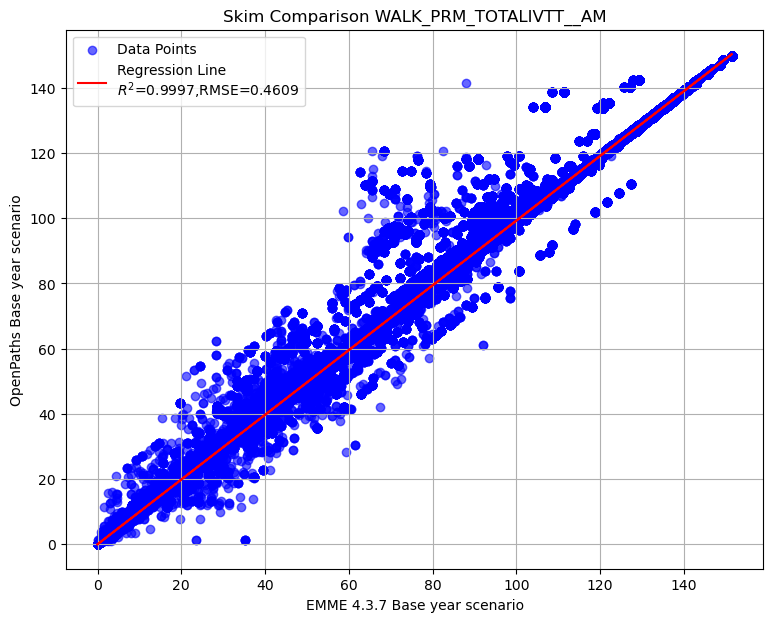

In [8]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim, 'WALK_PRM_TOTALIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0016
Slope: 0.9997
R² Score: 0.9988
RMSE: 0.4303


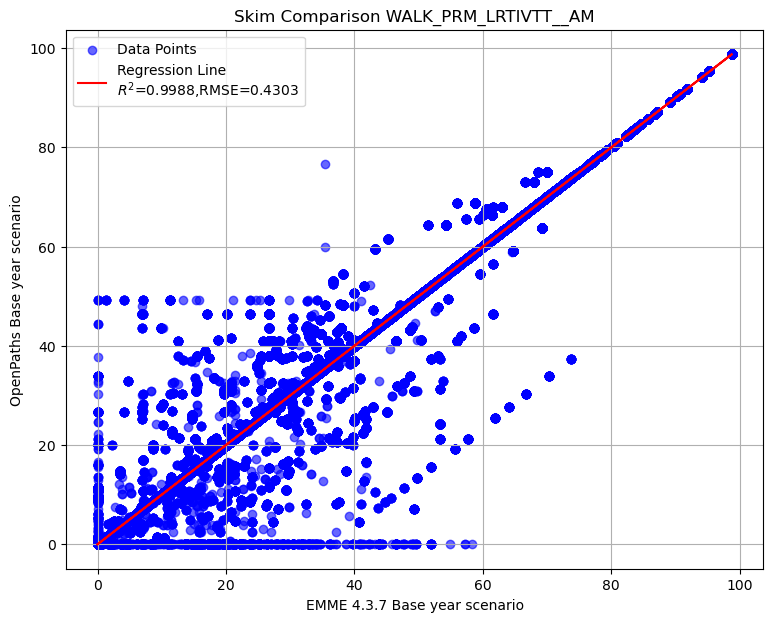

In [9]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_LRTIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: -0.0020
Slope: 0.9906
R² Score: 0.9910
RMSE: 0.7346


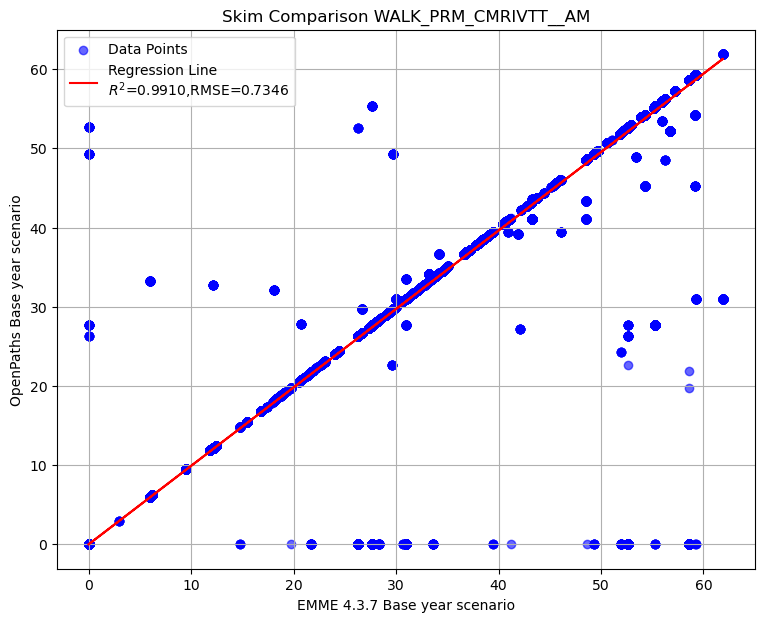

In [10]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_CMRIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: 0.0025
Slope: 0.9850
R² Score: 0.9973
RMSE: 0.3476


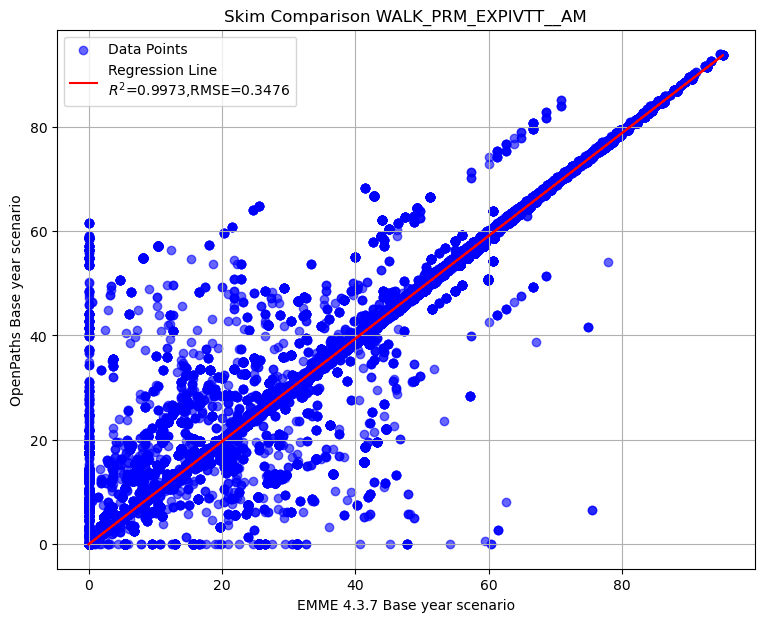

In [11]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_EXPIVTT__AM')

Scatterplot comparison of AM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0165
Slope: 0.9856
R² Score: 0.9962
RMSE: 0.9373


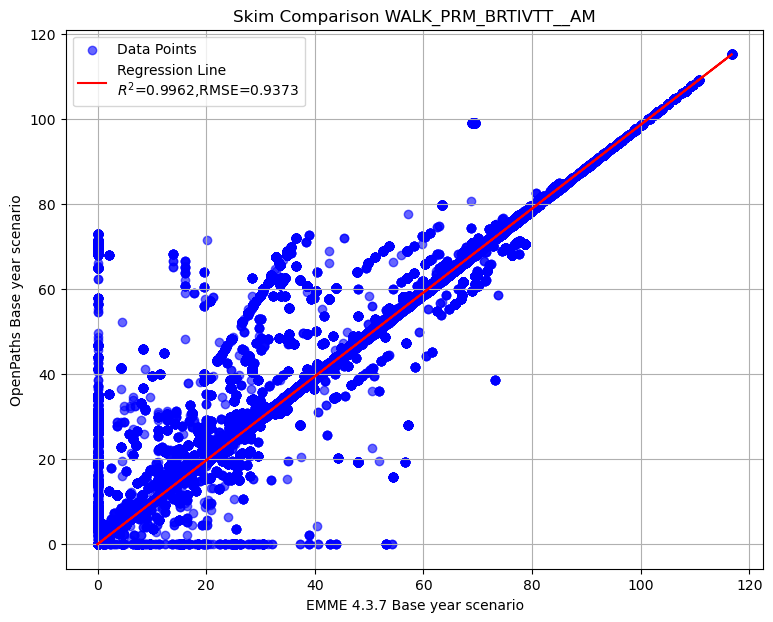

In [12]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_PRM_BRTIVTT__AM')

Intercept: 0.0454
Slope: 0.9937
R² Score: 0.9999
RMSE: 0.6308


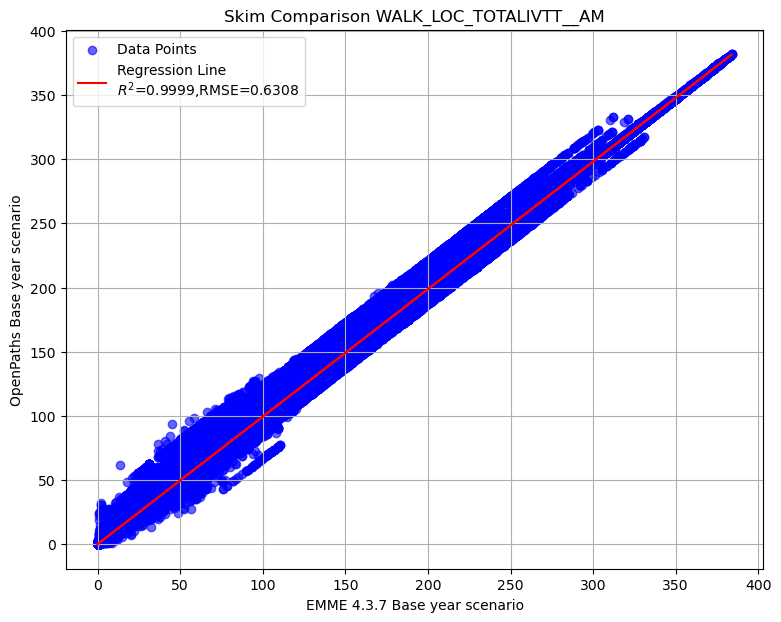

In [13]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_LOC_TOTALIVTT__AM')

Intercept: 0.1327
Slope: 0.9933
R² Score: 0.9967
RMSE: 2.7843


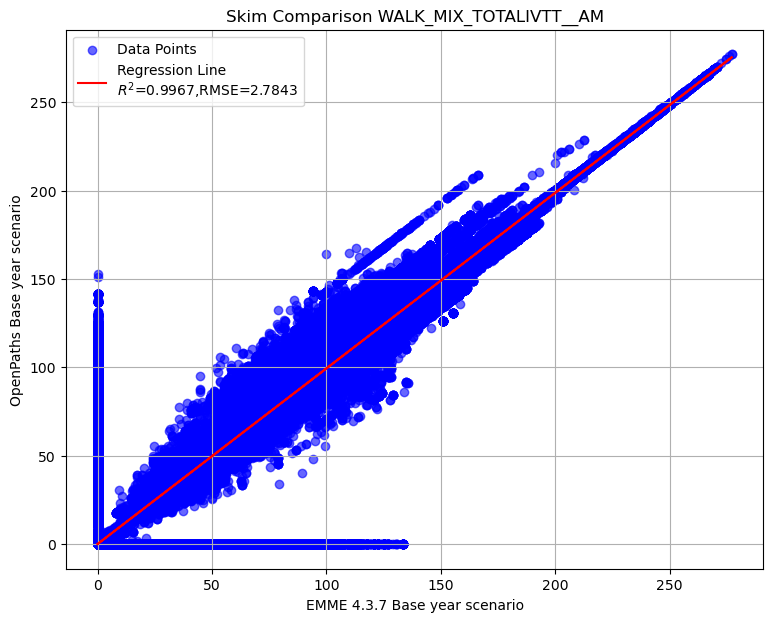

In [14]:
SkimCompare.regression_scatter_plot(base_skim, comp_skim,'WALK_MIX_TOTALIVTT__AM')

# Summary of transit AM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__AM)

In [15]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__AM', ascending=False).head().round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
1933,112,55.04,36.61,-58.57,8.89,68.11,-1.3,-0.01
3746,129,53.52,41.14,-52.62,0,65,-1.82,-0.02
1933,151,52.18,33.76,-58.57,8.89,68.11,-1.33,0
1933,162,52.18,33.76,-58.57,8.89,68.11,-1.28,-0.02
1933,141,52.18,33.76,-58.57,8.89,68.11,-1.33,-0.03


Below is the summary of selected matrices difference in transit AM skim

In [16]:
comparison_excluded = comparison.drop(columns=['Origin', 'Destination'])
desc = comparison_excluded.describe().applymap(lambda x: f"{x:,.2f}").style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
)
desc

,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
count,"24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00","24,472,809.00"
mean,-0.09,0.00,-0.02,-0.02,-0.05,-0.44,-0.14
std,0.50,0.43,0.74,0.36,0.96,0.82,2.80
min,-33.82,-58.35,-59.24,-68.82,-54.15,-33.19,-133.54
25%,0.00,0.00,0.00,0.00,0.00,-0.82,-0.19
50%,0.00,0.00,0.00,0.00,0.00,-0.07,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,55.04,49.24,52.65,61.51,72.95,48.56,152.59


Let's check the records with difference in WALK_PRM_LRTIVTT__AM greater than 50

In [17]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']>50].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM


Let's check the records with difference in WALK_PRM_LRTIVTT__AM less than -50

In [18]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']<-50].round(2).applymap(lambda x: f"{x:.2f}".rstrip('0').rstrip('.')).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}]  # Custom header style
).hide(axis = "index")

Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_BRTIVTT__AM,WALK_LOC_TOTALIVTT__AM,WALK_MIX_TOTALIVTT__AM
2627,1190,2.93,-51.9,0,54.84,0,-1.69,-0.12
2627,1199,2.93,-51.9,0,54.84,0,-1.69,-0.12
2641,1190,2.93,-51.9,0,54.84,0,-1.63,0
2641,1199,2.93,-51.9,0,54.84,0,-1.63,0
2650,1190,2.93,-51.9,0,54.84,0,-1.63,0
2650,1199,2.93,-51.9,0,54.84,0,-1.63,0
2713,1190,2.93,-51.9,0,54.84,0,-1.63,0
2713,1199,2.93,-51.9,0,54.84,0,-1.63,0
2726,1190,2.93,-51.9,0,54.84,0,-1.64,-0.13
2726,1199,2.93,-51.9,0,54.84,0,-1.64,-0.13
